In [30]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import random
import matplotlib.pyplot as plt
import pandas as pd
import pandas_datareader as web
import plotly.express as px
from scipy import stats
import statsmodels.api as sm
import yfinance as yf
from matplotlib.pyplot import figure


In [13]:
data = yf.download('NVDA', start = '2025-01-01', end = '2025-06-15')
data.head()

/var/folders/7t/w17knfdn36n_njq1kn6ytj_h0000gn/T/ipykernel_47531/546014907.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download('NVDA', start = '2025-01-01', end = '2025-06-15')
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,NVDA,NVDA,NVDA,NVDA,NVDA
Date,,,,,
2025-01-02,138.287674,138.857589,134.608275,135.978049,198247200
2025-01-03,144.446686,144.876609,139.707445,139.987399,229322500
2025-01-06,149.405869,152.135439,147.796143,148.566008,265377400
2025-01-07,140.117371,153.105279,139.987387,153.005289,351782200
2025-01-08,140.087387,143.926764,137.537796,142.556990,227349900


In [21]:
all_df = pd.DataFrame(data["Close"])
all_df.columns = ['Close']  # Set column name explicitly

for i in range(1, 8):
    all_df[f'lag_{i}'] = all_df['Close'].shift(i)

all_df.head(10)


,Close,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7
Date,,,,,,,,
2025-01-02,138.287674,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2025-01-03,144.446686,138.287674,NaN,NaN,NaN,NaN,NaN,NaN
2025-01-06,149.405869,144.446686,138.287674,NaN,NaN,NaN,NaN,NaN
2025-01-07,140.117371,149.405869,144.446686,138.287674,NaN,NaN,NaN,NaN
2025-01-08,140.087387,140.117371,149.405869,144.446686,138.287674,NaN,NaN,NaN
2025-01-10,135.888077,140.087387,140.117371,149.405869,144.446686,138.287674,NaN,NaN
2025-01-13,133.208496,135.888077,140.087387,140.117371,149.405869,144.446686,138.287674,NaN
2025-01-14,131.738724,133.208496,135.888077,140.087387,140.117371,149.405869,144.446686,138.287674
2025-01-15,136.218018,131.738724,133.208496,135.888077,140.087387,140.117371,149.405869,144.446686


In [23]:
all_df.dropna(inplace=True)
cols = [f'lag_{i}' for i in range(1, 8)]
train_df = all_df.iloc[0:180, :]
train_df.head(5)

,Close,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7
Date,,,,,,,,
2025-01-14,131.738724,133.208496,135.888077,140.087387,140.117371,149.405869,144.446686,138.287674
2025-01-15,136.218018,131.738724,133.208496,135.888077,140.087387,140.117371,149.405869,144.446686
2025-01-16,133.548447,136.218018,131.738724,133.208496,135.888077,140.087387,140.117371,149.405869
2025-01-17,137.687775,133.548447,136.218018,131.738724,133.208496,135.888077,140.087387,140.117371
2025-01-21,140.807266,137.687775,133.548447,136.218018,131.738724,133.208496,135.888077,140.087387


In [27]:
X = train_df[cols].to_numpy()
y = train_df['Close'].to_numpy()
w_hat = np.linalg.inv(X.T@X)@X.T@y
w_hat

array([ 0.8830576 ,  0.27753595, -0.29239179,  0.03647669,  0.1122361 ,
        0.05104023, -0.06783064])

/var/folders/7t/w17knfdn36n_njq1kn6ytj_h0000gn/T/ipykernel_47531/840875718.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/7t/w17knfdn36n_njq1kn6ytj_h0000gn/T/ipykernel_47531/840875718.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



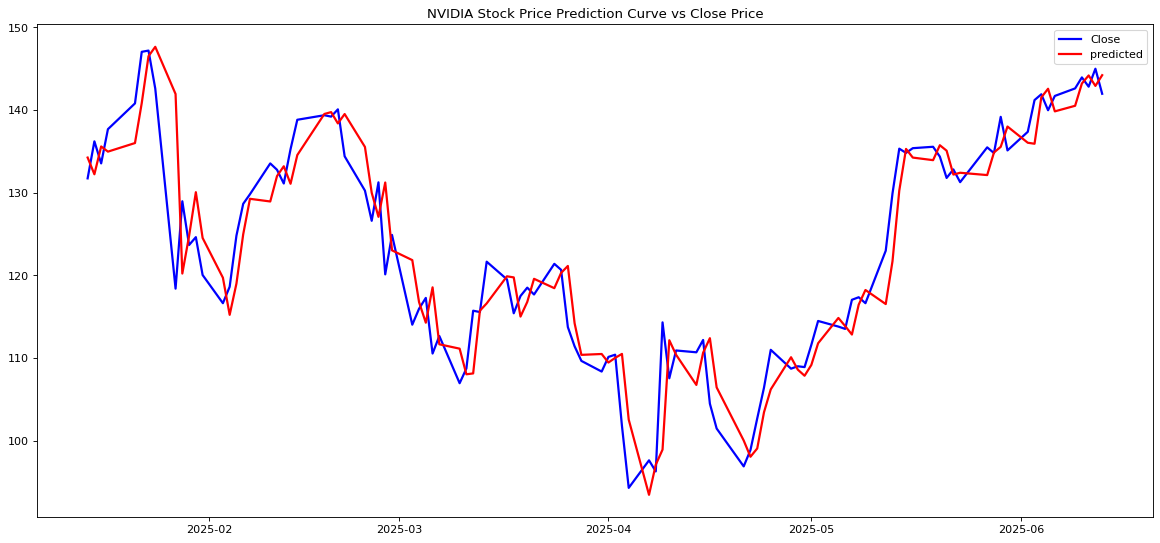

In [32]:
train_df['predicted'] = X@w_hat

figure(figsize=(18, 8), dpi=80)
plot_data = train_df[['Close', 'predicted']]
plot_data['Date'] = plot_data.index
plt.plot( 'Date', 'Close', data= plot_data, marker='', markerfacecolor='blue', color='blue', linewidth=2)
plt.plot( 'Date','predicted', data=plot_data, marker='', color='red', linewidth=2)
plt.legend()
plt.title('NVIDIA Stock Price Prediction Curve vs Close Price')
plt.show()

Prediction curve is pretty good! Now will move on to the prediction curve with bias.

In [34]:
train_df['ones'] = np.ones(len(train_df['Close']))
train_df.head(5)

/var/folders/7t/w17knfdn36n_njq1kn6ytj_h0000gn/T/ipykernel_47531/3855497709.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Close,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,predicted,ones
Date,,,,,,,,,,
2025-01-14,131.738724,133.208496,135.888077,140.087387,140.117371,149.405869,144.446686,138.287674,134.256401,1.0
2025-01-15,136.218018,131.738724,133.208496,135.888077,140.087387,140.117371,149.405869,144.446686,132.234420,1.0
2025-01-16,133.548447,136.218018,131.738724,133.208496,135.888077,140.087387,140.117371,149.405869,135.598454,1.0
2025-01-17,137.687775,133.548447,136.218018,131.738724,133.208496,135.888077,140.087387,140.117371,134.973441,1.0
2025-01-21,140.807266,137.687775,133.548447,136.218018,131.738724,133.208496,135.888077,140.087387,136.011438,1.0


In [36]:
cols = [f'lag_{i}' for i in range (1,8)]
cols.append('ones')
train_df[cols].head(5)

,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,ones
Date,,,,,,,,
2025-01-14,133.208496,135.888077,140.087387,140.117371,149.405869,144.446686,138.287674,1.0
2025-01-15,131.738724,133.208496,135.888077,140.087387,140.117371,149.405869,144.446686,1.0
2025-01-16,136.218018,131.738724,133.208496,135.888077,140.087387,140.117371,149.405869,1.0
2025-01-17,133.548447,136.218018,131.738724,133.208496,135.888077,140.087387,140.117371,1.0
2025-01-21,137.687775,133.548447,136.218018,131.738724,133.208496,135.888077,140.087387,1.0


Now add bias

/var/folders/7t/w17knfdn36n_njq1kn6ytj_h0000gn/T/ipykernel_47531/922585192.py:2: RuntimeWarning:

divide by zero encountered in matmul

/var/folders/7t/w17knfdn36n_njq1kn6ytj_h0000gn/T/ipykernel_47531/922585192.py:2: RuntimeWarning:

overflow encountered in matmul

/var/folders/7t/w17knfdn36n_njq1kn6ytj_h0000gn/T/ipykernel_47531/922585192.py:2: RuntimeWarning:

invalid value encountered in matmul

/var/folders/7t/w17knfdn36n_njq1kn6ytj_h0000gn/T/ipykernel_47531/922585192.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/7t/w17knfdn36n_njq1kn6ytj_h0000gn/T/ipykernel_47531/922585192.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instea

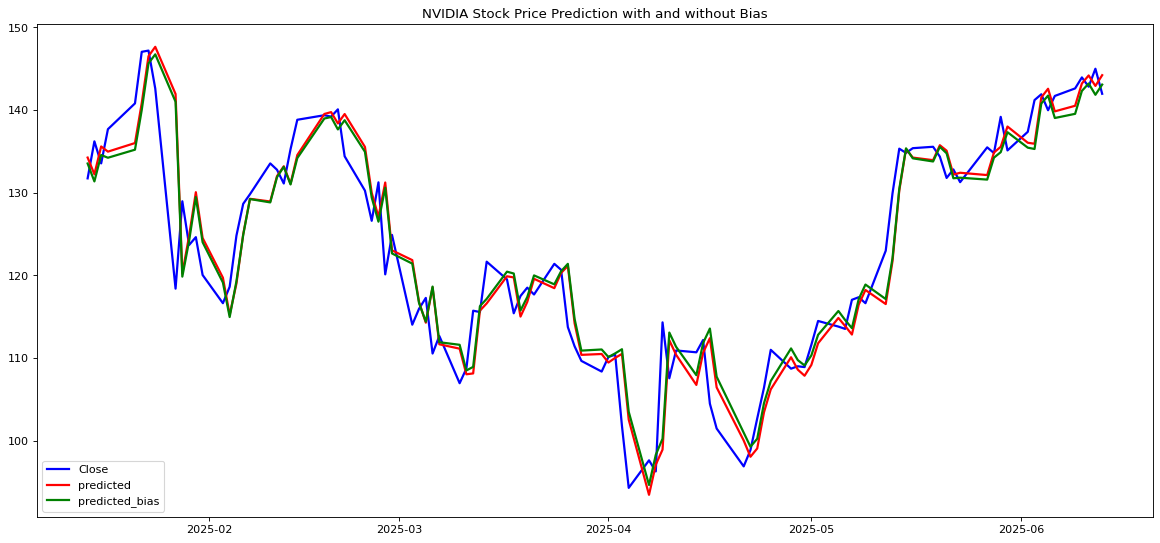

In [39]:
X_bias = train_df[cols].to_numpy()
w_hat_bias = np.linalg.inv(X_bias.T@X_bias)@X_bias.T@y
train_df['predicted_bias'] = X_bias@w_hat_bias


figure(figsize=(18, 8), dpi=80)
plot_data = train_df[['Close', 'predicted', 'predicted_bias']]
plot_data['Date'] = plot_data.index
plt.plot( 'Date', 'Close', data= plot_data, marker='', markerfacecolor='blue', color='blue', linewidth=2)
plt.plot( 'Date','predicted', data=plot_data, marker='', color='red', linewidth=2)
plt.plot( 'Date','predicted_bias', data=plot_data, marker='', color='green', linewidth=2)
plt.title('NVIDIA Stock Price Prediction with and without Bias')
plt.legend()
plt.show()

Time for finding the Mean Squared Error (MSE)

In [40]:
y_hat_1 = train_df["predicted"].to_numpy()
y_hat_2 = train_df["predicted_bias"].to_numpy()

def RMSE(labels, predicted):
    return np.sqrt(np.mean((labels - predicted) @ (labels - predicted)))

print(f'In-Sample MSRE_without_bias ={RMSE(y, y_hat_1)}')
print(f'In-Sample MSRE_with_bias ={RMSE(y, y_hat_2)}')


In-Sample MSRE_without_bias =48.51655968258038
In-Sample MSRE_with_bias =47.93280256521313


/var/folders/7t/w17knfdn36n_njq1kn6ytj_h0000gn/T/ipykernel_47531/99893962.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



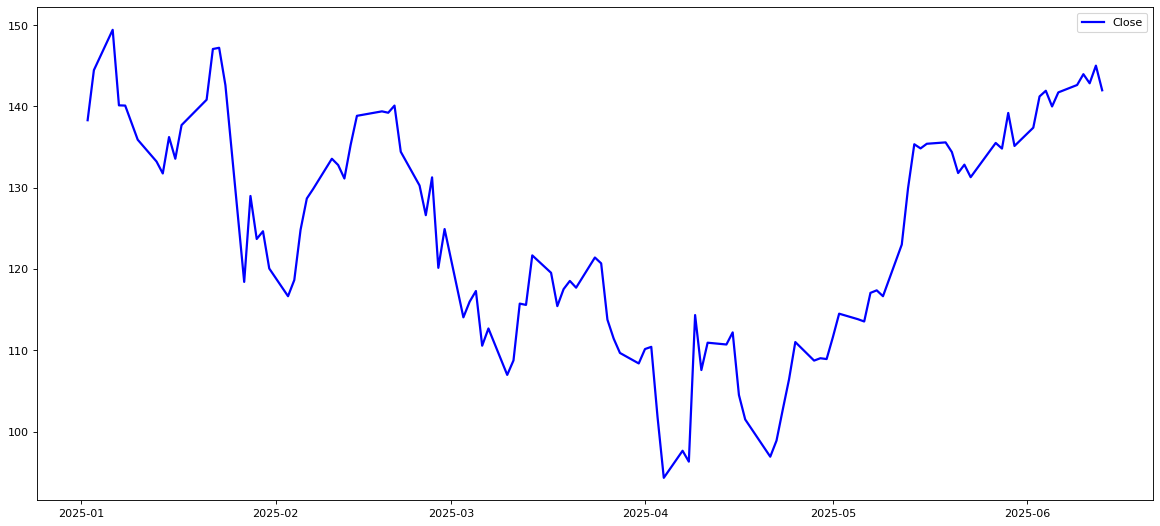

In [41]:
data["log_Close"] = np.log(data["Close"])

figure(figsize=(18, 8), dpi=80)
plot_data = data[['Close']]
plot_data['Date'] = plot_data.index
plt.plot( 'Date', 'Close', data= plot_data, marker='', markerfacecolor='blue', color='blue', linewidth=2)
plt.legend()
plt.show()